# The sturcture of Garbage Detection
Annotated images are presented as the same format to [PASCAL VOC](http://host.robots.ox.ac.uk/pascal/VOC/).
- trainedModels
    - faster RCNN
    - retinaNet

# The statistical information of the dataset

In [1]:
from xml.etree import ElementTree
from xml.dom import minidom
import collections

import os

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [3]:
os.getcwd()

'g:\\dataset\\newlabel\\train'

In [5]:
base_path = os.path.join(os.getcwd(), 'batch1_garbage')

wasteTypes=[
"fouled_plastic","packaging_bag","PE_plastic_bag",
"paper_waste","plastic_glass_container","other","leftovers",
"vegetable_fruit_waste","Fish_shrimp_crab","vegetable_leaves_roots","eggshell",
]

cnWasteType = [
"其他垃圾(难以分辨或者数量稀疏的非厨余垃圾)","PE塑料袋","污损塑料",
"包装袋","废纸","塑料玻璃容器","果蔬废料","鱼骨虾蟹壳","菜根菜叶","残渣剩饭","蛋壳"
]

waste_s = [i for i in range(len(wasteTypes))]

In [9]:
# the number of total images and total labels.
cls_names = []
total_images = 0

file_list = [filename for filename in os.listdir(base_path + '/labels/') if not filename.startswith('.')]

with open("trainval.txt", "w") as text_file:
    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + '/labels/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            cnt_this = 0
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                if cls_name == '0':
                    print(file)
                cls_names.append(cls_name)
                cnt_this += 1
            text_file.write(file + " labels: %s\n" % cnt_this)
    

print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))

total
# of images：526
# of labels：3985


fouled_plastic : 301
其他垃圾(难以分辨或者数量稀疏的非厨余垃圾) : 301
packaging_bag : 181
PE塑料袋 : 181
PE_plastic_bag : 218
污损塑料 : 218
paper_waste : 357
包装袋 : 357
plastic_glass_container : 41
废纸 : 41
other : 353
塑料玻璃容器 : 353
leftovers : 127
果蔬废料 : 127
vegetable_fruit_waste : 1052
鱼骨虾蟹壳 : 1052
Fish_shrimp_crab : 47
菜根菜叶 : 47
vegetable_leaves_roots : 379
残渣剩饭 : 379
eggshell : 929
蛋壳 : 929


d:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


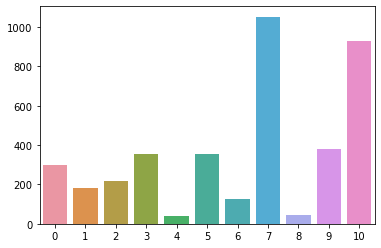

In [10]:
# the number of each class labels.
import collections
count_dict = collections.Counter(cls_names)
cls_count = []
for wasteType in wasteTypes:
    print(str(wasteType) + ' : ' + str(count_dict[wasteType]))
    print(cnWasteType[wasteTypes.index(wasteType)] + ' : ' + str(count_dict[wasteType]))
    cls_count.append(count_dict[wasteType])
    
sns.set_palette("winter", 8)
sns.barplot(waste_s, cls_count)

# Check some images in this dataset

In [12]:
import cv2
import PIL
import random

In [16]:
def draw_images(xml_file):
    
    img = cv2.imread(base_path + '/images/' + xml_file.split('.')[0] + '.jpg')
    
    infile_xml = open(base_path + '/labels/' +xml_file)
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    clsN = []
    for obj in root.iter('object'):
        cls_name = obj.find('name').text
        xmlbox = obj.find('bndbox')
        xmin = int(xmlbox.find('xmin').text)
        xmax = int(xmlbox.find('xmax').text)
        ymin = int(xmlbox.find('ymin').text)
        ymax = int(xmlbox.find('ymax').text)

        font = cv2.FONT_HERSHEY_SIMPLEX

        # put text
        
        cv2.putText(img,cls_name,(xmin,ymin-10),font,1,(0,255,0),2,cv2.LINE_AA)

        # draw bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,255,0),3)
        clsN.append(cls_name)
    return img,clsN

In [17]:
tmp = file_list
for a,b in enumerate(tmp[0:1]):
    print(a,b)

0 2022-01-16_19_11_02.xml


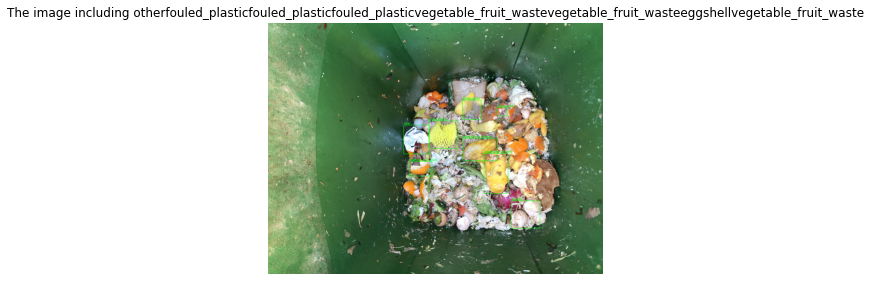

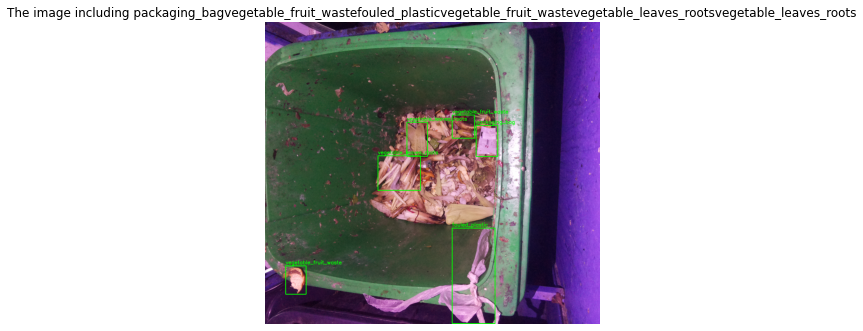

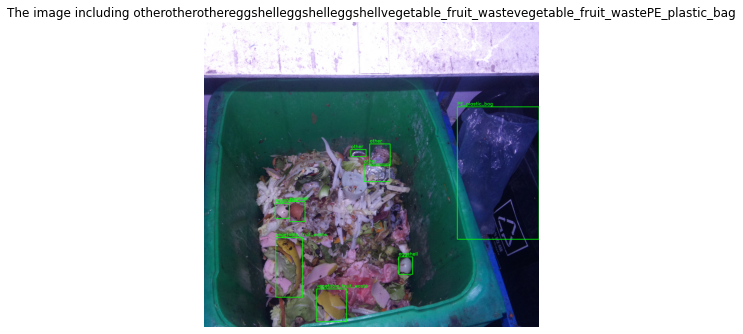

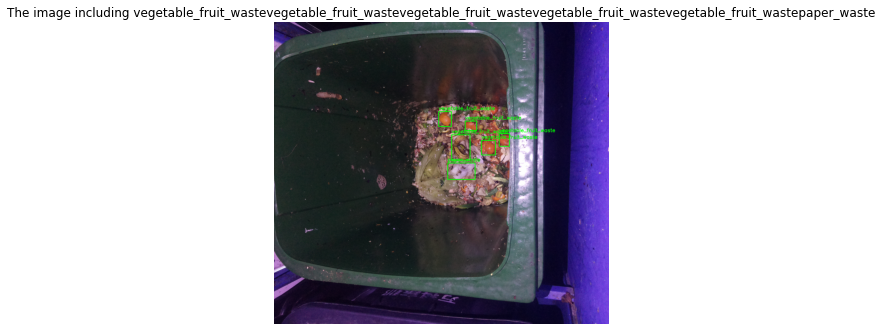

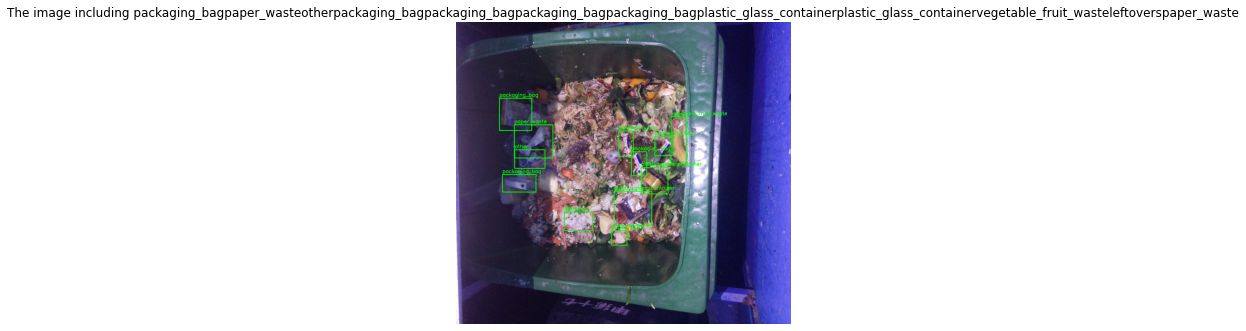

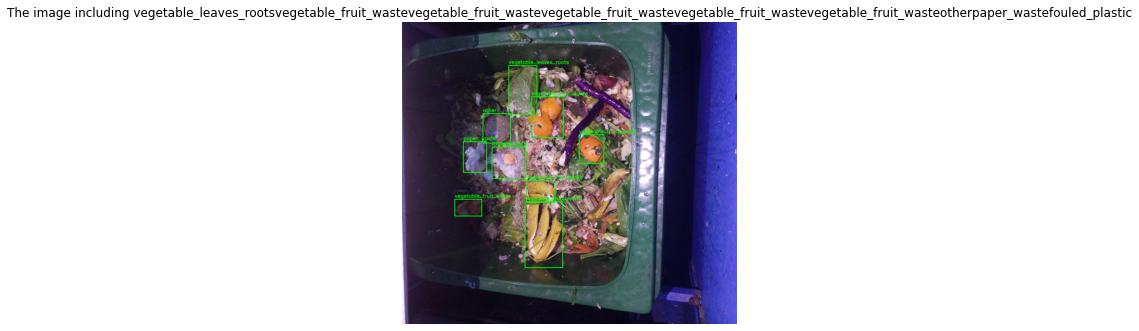

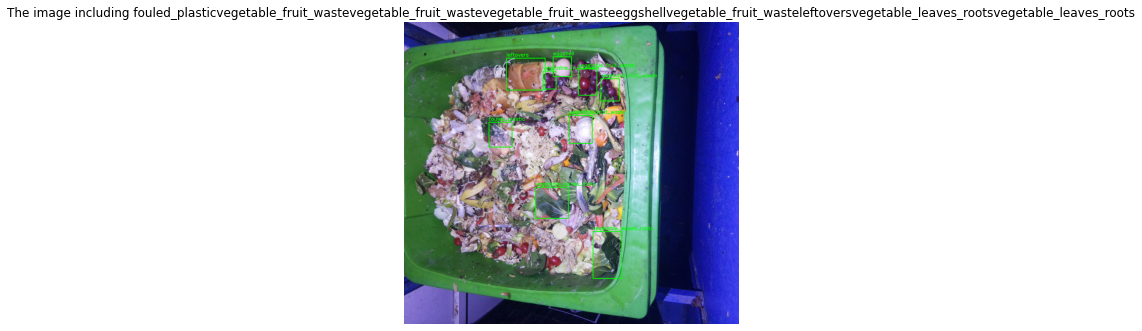

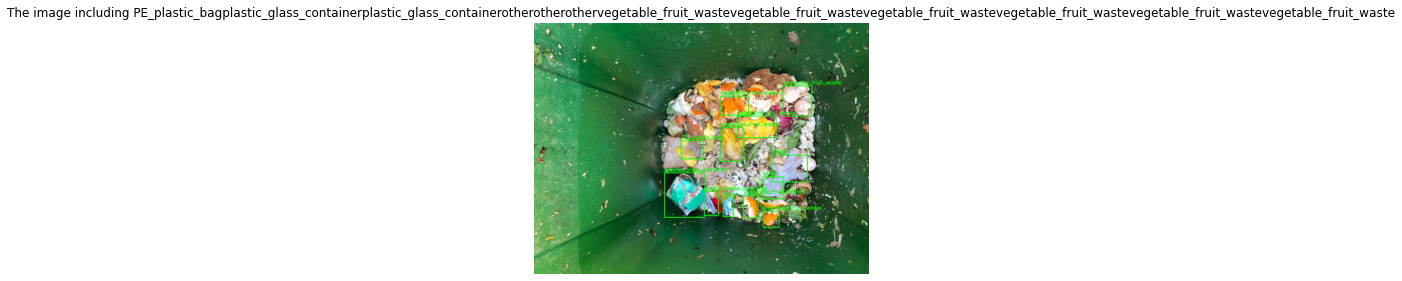

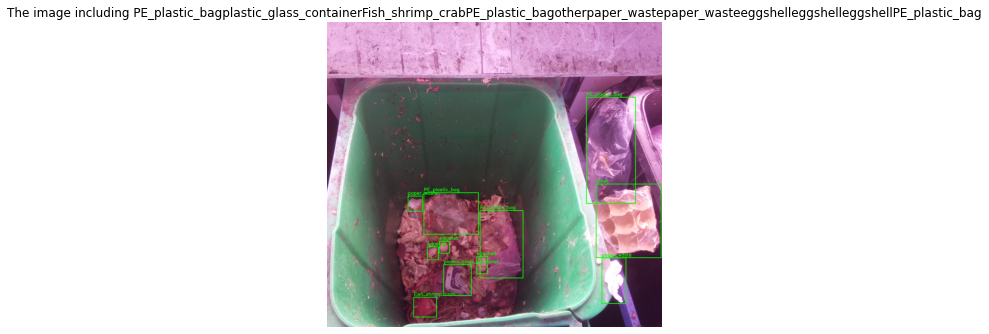

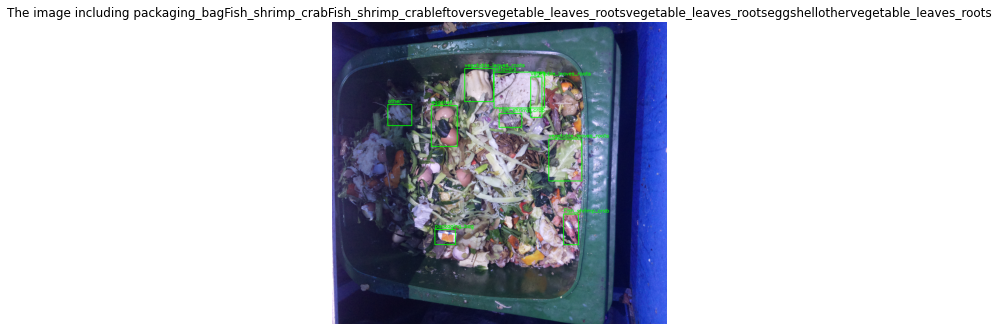

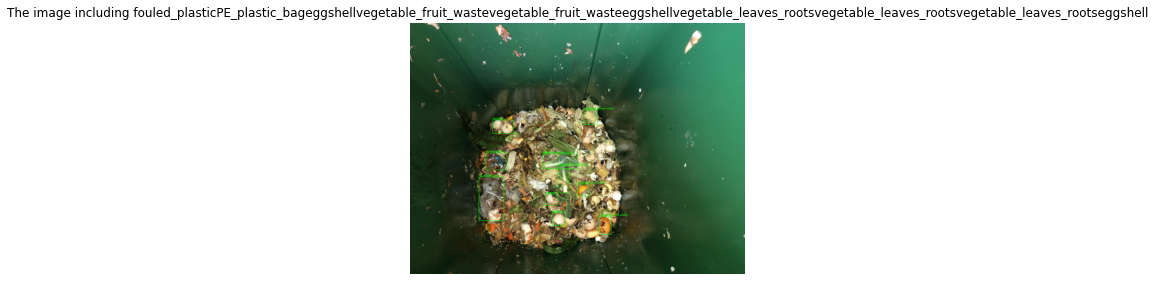

In [18]:
for damageType in wasteTypes:
    random.shuffle(tmp)
    fig = plt.figure(figsize=(6,6))
    for number, image in enumerate(tmp):
        img,cls = draw_images(image)
        if damageType in cls:
            plt.subplot(1,1,1)
            plt.axis('off')
            plt.title('The image including ' + ''.join(str(e) for e in cls))
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            break